# <center>Data Mining Project Code</center>

** **
## <center>*03 - Cuisine Preference Clustering*</center>

** **

In this notebook, we aim to understand customer behaviors and preferences by clustering them based on their culinary orders. By segmenting customers according to the types of cuisines they frequently order, we can uncover patterns in their consumption habits. This information will allow businesses to tailor marketing strategies, optimize inventory, and offer personalized recommendations, ultimately enhancing the customer experience.

The primary goal of this notebook is to apply unsupervised learning techniques to identify distinct customer groups based on their preference for different cuisines. We will utilize clustering algorithms such as KMeans, Hierarchical Clustering, SOM and Density-Based Algorithms to form these groups, and evaluate the clustering quality using various metrics like R², Silhouette Score, and Calinski-Harabasz Index.

At the end, we will compare our best solutions and explore the best one, creating customer profiles for each segment and interpreting their characteristics. By doing so, we aim to provide actionable insights for businesses to enhance customer satisfaction and improve operational efficiencies.


The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Clustering](#2.-Clustering) <br>

    2.1 [Hierarchical Clustering](#2.1-Hierarchical-Clustering) <br><br>
    2.2 [K-Means](#2.2-K-Means) <br><br>
    2.3 [Self-Organizing Maps (SOM)](#2.3-Self-Organizing-Maps-(SOM)) <br><br>
    2.4 [Density-based Clustering](#2.4-Density-based-Clustering) <br>
    
    &emsp; 2.4.1 [Meanshift](#2.4.1-Meanshift)<br><br>
    &emsp; 2.4.2 [DBScan](#2.4.2-Density-Based-Spatial-Clustering-of-Applications-with-Noise-(DBSCAN))<br><br>
    &emsp; 2.4.3 [Gaussian Mixture Model (GMM)](#2.4.3-Gaussian-Mixture-Model-(GMM))<br>

4. [Model Comparison](#4.-Model-Comparison)
 

# 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display 

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from hdbscan import HDBSCAN
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.neighbors import NearestNeighbors
import umap.umap_ as umap

# Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

pd.set_option('display.max_columns', None)

# Others
import functions as f

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

path = './plots/cuisine/'

In [ ]:
# Select features used to train the model
features = s.cuisine_preferences

In [2]:
data = pd.read_csv('data/data.csv', 
                   index_col = "customer_id")
cui_data = data[features]
cui_data

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
180c632ed8,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0
4eb37a6705,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6b6709018,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f74ad8ce3f,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# 2. Clustering

In [3]:
scaled_data = cui_data.copy()
scaler = MinMaxScaler().fit_transform(cui_data[features])
scaled_data = pd.DataFrame(scaled_data, 
                           columns=cui_data.columns, 
                           index=cui_data.index)

## 2.1 Hierarchical Clustering

To develop a clustering solution using hierarchical clustering, the following steps were carried out:

**1. Creating Dendrograms for All Combinations**
- Dendrograms were generated for all combinations of linkage methods (e.g., single, complete, average, ward) and distance metrics (e.g., Euclidean, Manhattan).
- This step provided a visual representation of the clustering hierarchy to understand how clusters merge at different thresholds.
- The dendrograms were analysed to identify configurations that produced distinct and meaningful clusters.

**2. Selecting the Best Combinations**
- Based on the dendrograms, the most promising combinations of linkage methods and distance metrics were shortlisted.
- The selection was based on:
  - Clear separation of clusters (visible gaps in the dendrograms).
  - Avoidance of configurations that produced excessive chaining effects or imbalanced clusters.
- This step narrowed the scope to the most viable configurations.

**3. Evaluating the Shortlisted Combinations**
- The shortlisted configurations were quantitatively evaluated using the following metrics:
  - **R² Score**: Measures how well the clustering structure explains the variance in the data. Higher values indicate a better-defined cluster structure.
  - **Silhouette Score**: Evaluates the compactness and separation of clusters. Scores range from -1 (poor clustering) to 1 (ideal clustering), providing insights into cluster quality.
  - **Calinski-Harabasz Score**: Assesses the ratio of the sum of cluster dispersion to inter-cluster distances. Higher values indicate well-separated and compact clusters.
- By leveraging these metrics, the combination of linkage methods and distance metrics producing the highest-quality clusters was identified and selected.


The plots below show the dendrograms of different combinations of metrics and linkage methods. It takes about 20 minutes to run both functions so they were commented and the plots can be seen the the folder plots/cuisine.

In [4]:
linkages=["complete", "average", "single", "ward"]

In [5]:
# f.plot_hierarchical_dendrograms(scaled_data, path=path+'euclidean', linkages=linkages, metrics=['euclidean'])

In [6]:
# f.plot_hierarchical_dendrograms(scaled_data, path=path+'others', linkages=["complete", "average", "single"], metrics=['l1', 'l2', 'manhattan'])

In [7]:
hr_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 9)  
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 7)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 6) 
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hr_results.append(result)

# Convert results to DataFrame
hr_results_df = pd.DataFrame(hr_results)
hr_results_df

,Model,n_clusters,linkage,metric,R2,Silhouette,Calinski-Harabasz
0,hierarchical,2,ward,euclidean,0.184319,0.585093,7191.701523
1,hierarchical,3,ward,euclidean,0.270576,0.493652,5902.663760
2,hierarchical,4,ward,euclidean,0.315165,0.484077,4881.851770
3,hierarchical,5,ward,euclidean,0.353829,0.145520,4356.396024
4,hierarchical,6,ward,euclidean,0.391131,0.173777,4088.424059
5,hierarchical,7,ward,euclidean,0.417362,0.178622,3799.070509
6,hierarchical,8,ward,euclidean,0.442734,0.183522,3611.460757
7,hierarchical,2,complete,l1,0.012093,0.946808,389.587156
8,hierarchical,3,complete,l1,0.089771,0.837038,1569.366960
9,hierarchical,4,complete,l1,0.101962,0.830756,1204.411775


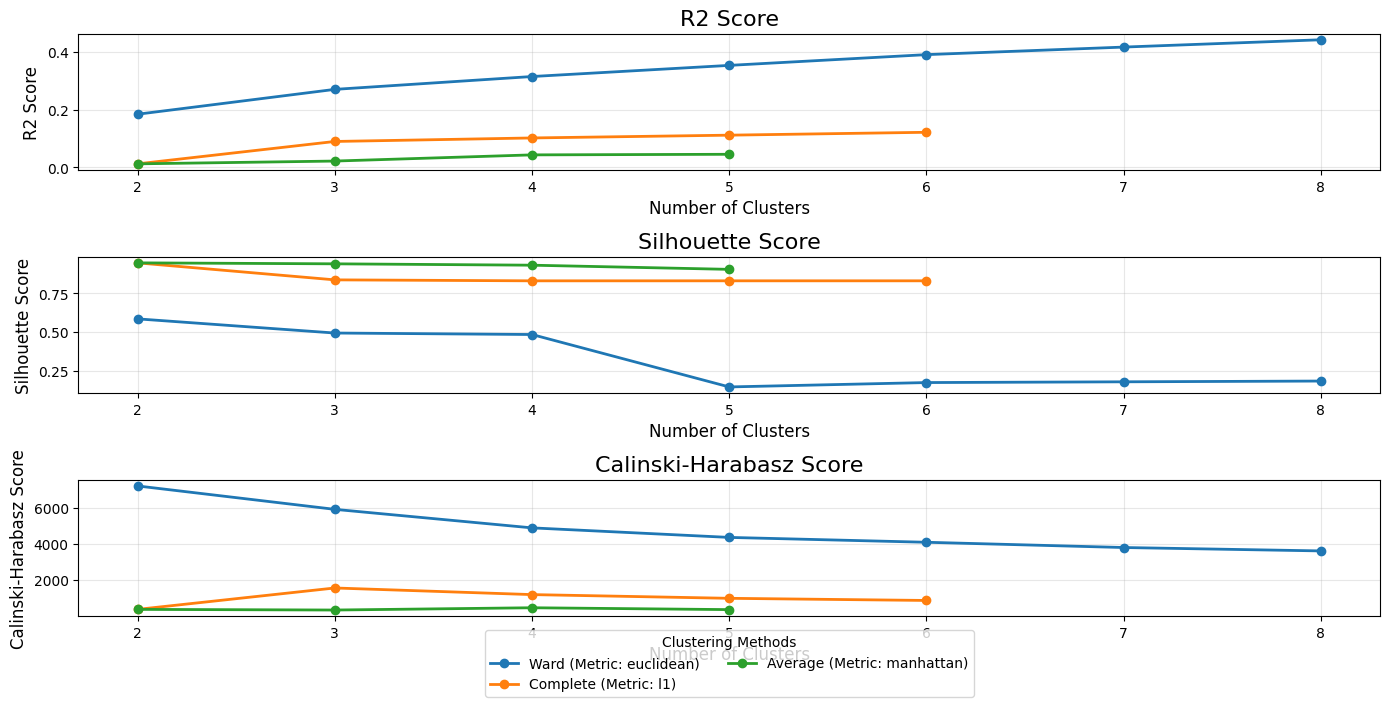

In [8]:
f.plot_evaluation_scores(hr_results_df, path+'hierarchical')

**Final Model**

In [9]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 4

hc_model = AgglomerativeClustering(linkage=linkage, 
                                 metric=distance, 
                                 n_clusters=n_clusters)

scaled_data['hc_labels'] = hc_model.fit_predict(scaled_data[features])

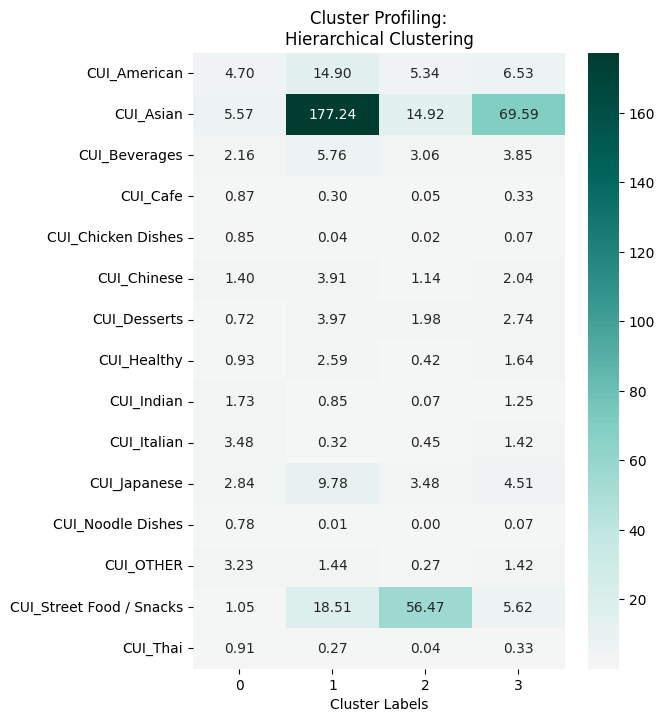

In [ ]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['hc_labels'], "Hierarchical")

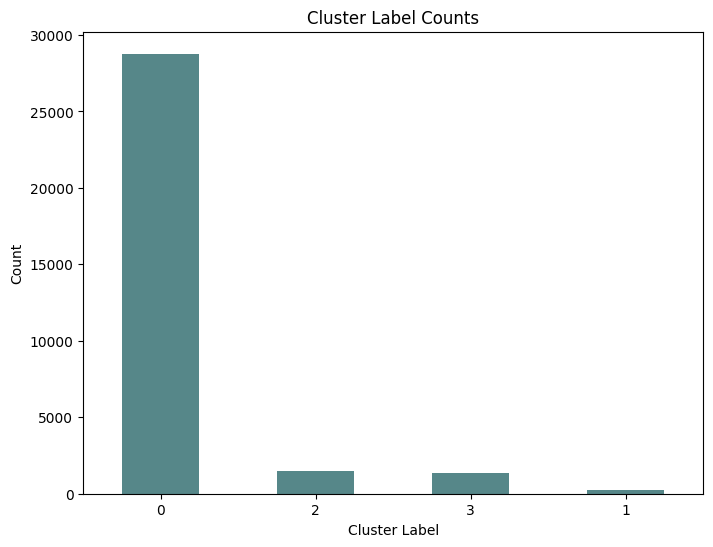

In [11]:
f.plot_counts(scaled_data['hc_labels'])

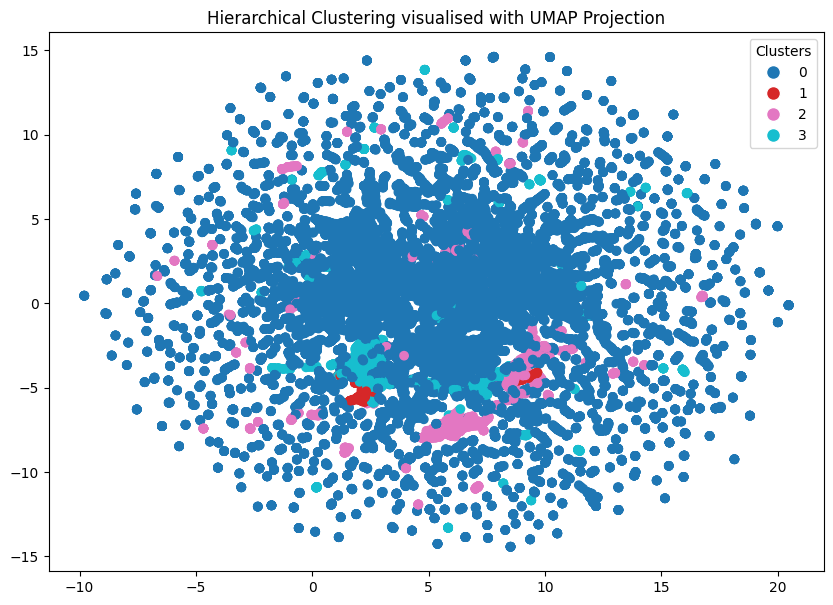

In [16]:
umap_object = umap.UMAP(n_neighbors = 5)

umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['hc_labels'],
                   technique = 'Hierarchical Clustering visualised with UMAP')

## 2.2 K-Means

To develop an optimal clustering solution using the K-Means algorithm, the following steps were carried out:

1. **Using the Elbow Method to Determine a Range for `n_clusters`**
- We began by using the **Elbow Method** to determine an appropriate range of values for the `n_clusters` hyperparameter.
- By plotting the within-cluster sum of squared distances (inertia) for a range of values of `n_clusters`, we identified the "elbow point," where increasing the number of clusters resulted in diminishing improvements to the inertia.
- This step provided a good initial estimate for the potential number of clusters and helped guide further testing.

2. **Evaluating Different `n_clusters` Values**
- After identifying a range of `n_clusters`, we evaluated different values of `n_clusters` based on various clustering quality metrics:
  - **R² Score**
  - **Silhouette Score**
  - **Calinski-Harabasz Score**
- These metrics allowed us to compare the effectiveness of each value for `n_clusters`, providing quantitative insights into cluster quality.

3. **Selecting the Optimal `n_clusters`**
- After evaluating multiple values for `n_clusters` with the metrics, we selected the value that showed the best balance across all three performance measures.
- This value provided the most meaningful and stable clusters, indicating that the K-Means algorithm was able to separate the data in a way that maximized clustering quality.
  
By focusing primarily on tuning `n_clusters`, we ensured that our clustering solution was optimized and tailored to the specific dataset, ultimately delivering high-quality, interpretable clusters.

**Elbow Method**

The **Elbow Method** is a technique used to determine the optimal number of clusters (`n_clusters`) for K-Means clustering. It involves plotting the within-cluster sum of squared distances (inertia) against different values of `n_clusters`. As the number of clusters increases, the inertia decreases, but at a certain point, the rate of improvement slows down. 

The "elbow" is the point on the plot where the inertia starts to level off, indicating that adding more clusters does not lead to significant improvements in clustering quality. This point suggests the optimal number of clusters to use for the dataset, balancing between overfitting and underfitting the model.


In [17]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30, init='k-means++').fit(scaled_data)
    dispersion.append(kmeans.inertia_)

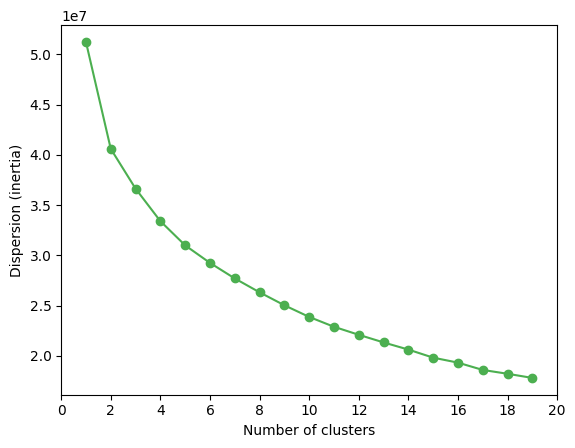

In [18]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

Based on the elbow plot, the following conclusions can be drawn for the optimal number of clusters (`k`) for K-Means:

**Range: 3 to 6 Clusters**

- **Elbow Point**: The elbow point appears around 4 clusters, which suggests a good balance between minimizing dispersion and maintaining model simplicity.
- **Flattening**: After the elbow point, the plot flattens, indicating that increasing the number of clusters beyond 4 results in diminishing improvements in the clustering performance.
- **Overfitting Risk**: Using more than 6 clusters may lead to overfitting, as the model could start capturing noise in the data rather than the underlying patterns.


In [19]:
results_kmeans = []

# Define clustering settings
cluster_settings = [
    {"model_type": "kmeans", "n_clusters": k, 'random_state': 42, 'n_init': 20, 'init':'k-means++'} for k in range(3,7)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    results_kmeans.append(result)

# Convert results to DataFrame
kmeans_results_df = pd.DataFrame(results_kmeans)
kmeans_results_df

,Model,n_clusters,random_state,n_init,init,R2,Silhouette,Calinski-Harabasz
0,kmeans,3,42,20,k-means++,0.284934,0.545209,6340.704509
1,kmeans,4,42,20,k-means++,0.348092,0.393948,5664.227877
2,kmeans,5,42,20,k-means++,0.395135,0.402793,5197.186530
3,kmeans,6,42,20,k-means++,0.429232,0.398228,4786.188045


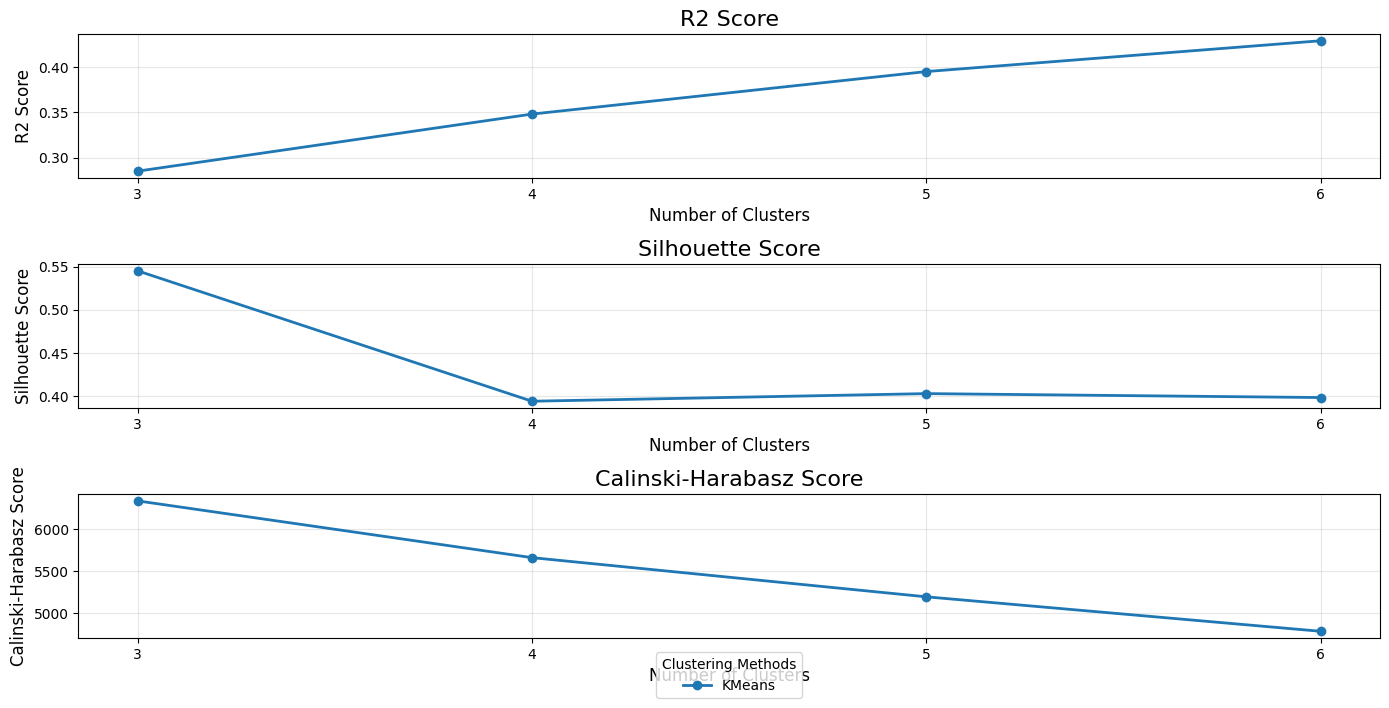

In [20]:
f.plot_evaluation_scores(kmeans_results_df, path+'Kmeans')

**Final Model**

After evaluating multiple clustering models, we have shortlisted the two best-performing models based on various metrics.

To further evaluate and compare the best two clustering models, we will examine their clustering solutions by profiling the clusters based on their feature means. We will use **Cluster Profiling** to visualize the mean values of the features for each cluster using a heatmap. The heatmap will highlight any significant patterns, differences between clusters, and overall cohesion within each group.

This approach will enable us to analyze and interpret the clustering solutions, making it easier to decide which model yields more meaningful and well-separated clusters.

By comparing the cluster profiles, we will be able to assess:
- The **separation** of clusters based on feature means.
- The **interpretability** of clusters based on how the features differ across them.


In [21]:
# For one solution of kmeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20, init='k-means++')
scaled_data['kmeans5_labels'] = kmeans.fit_predict(scaled_data[features])

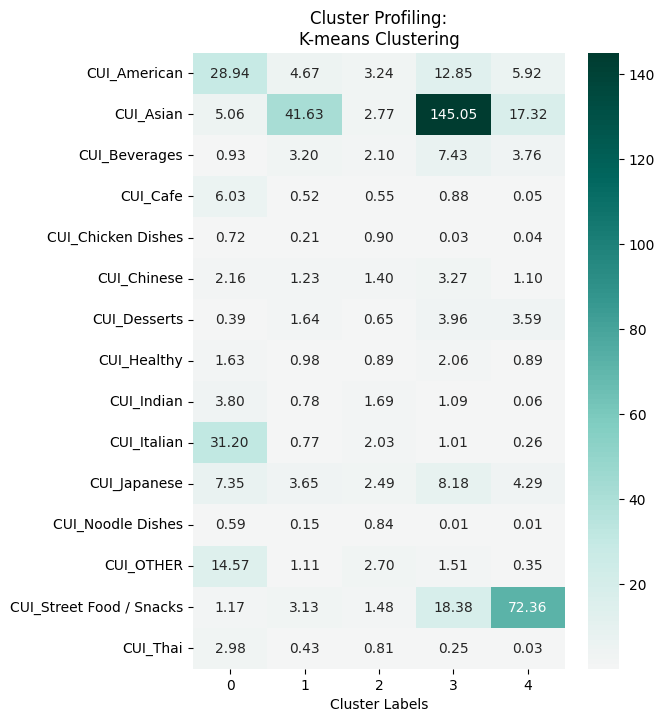

In [ ]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['kmeans5_labels'], "K-means")

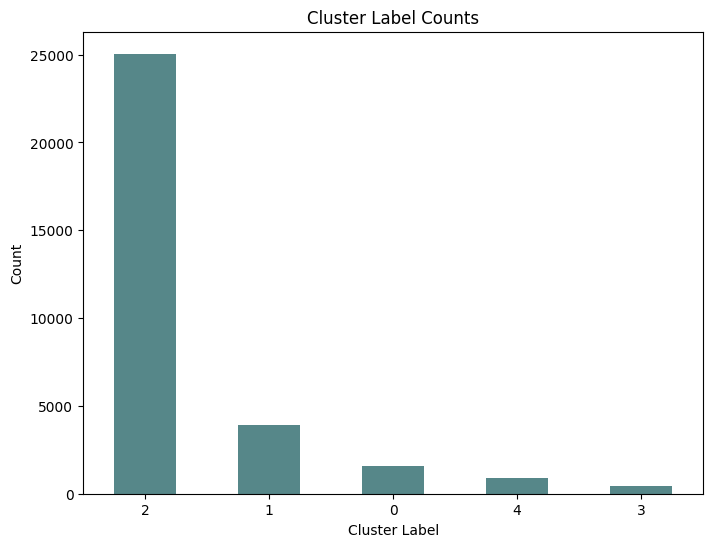

In [23]:
f.plot_counts(scaled_data['kmeans5_labels'])

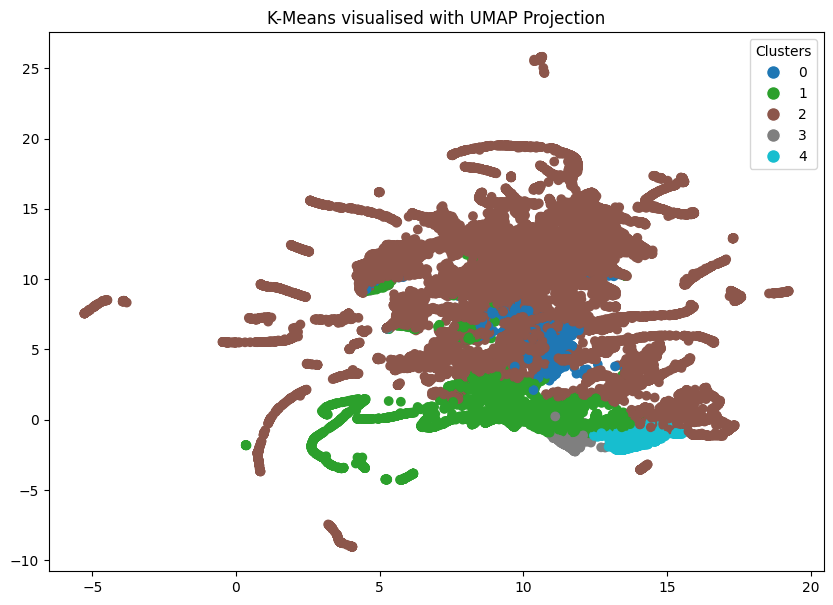

In [24]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['kmeans5_labels'],
                   technique = 'K-Means visualised with UMAP')

In [25]:
# For one solution of kmeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=20, init='k-means++')
scaled_data['kmeans6_labels'] = kmeans.fit_predict(scaled_data[features])

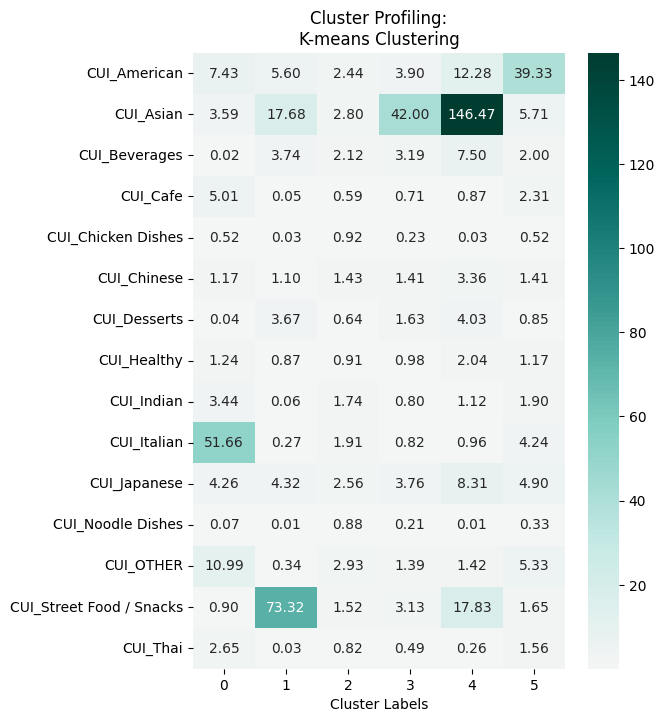

In [ ]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['kmeans6_labels'], "K-means")

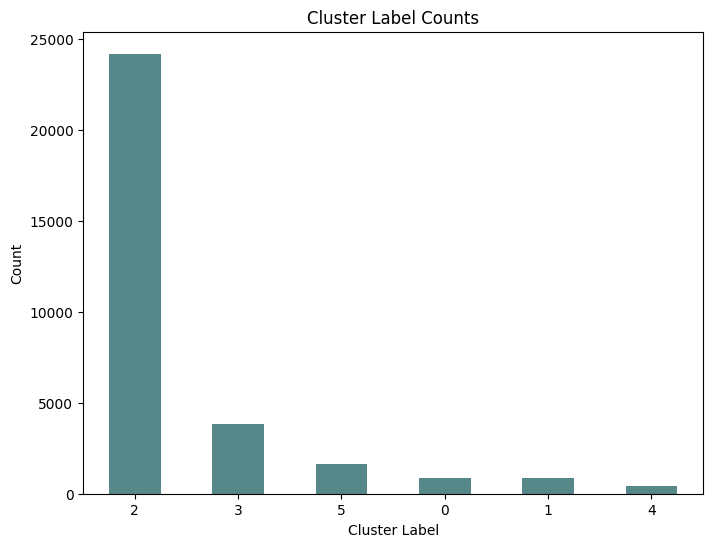

In [27]:
f.plot_counts(scaled_data['kmeans6_labels'])

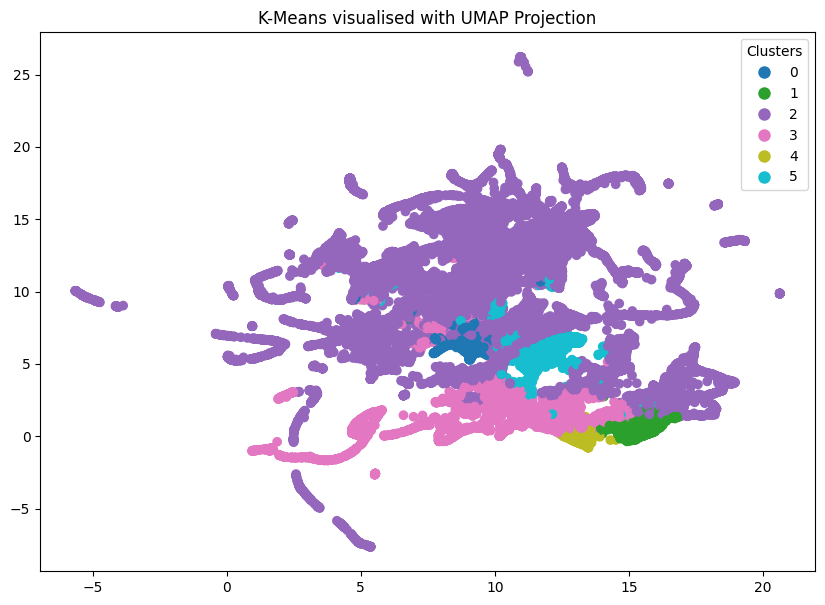

In [28]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['kmeans6_labels'],
                   technique = 'K-Means visualised with UMAP')

# The best solution is...

## 2.3 Self-Organizing Maps (SOM)

In [29]:
scaled_data_array = scaled_data.to_numpy()

In [30]:
som = MiniSom(
    15, 
    15, 
    len(features),
    sigma=0.5,
    neighborhood_function='gaussian',
    learning_rate = 1,
    random_seed=42
    )

In [31]:
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data_array, i)
    q_errors.append(som.quantization_error(scaled_data_array))

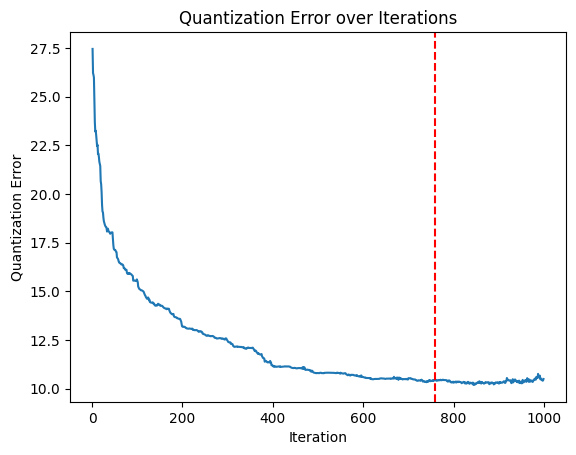

In [32]:
plt.plot(range(1, num_iterations), q_errors)
plt.title('Quantization Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Quantization Error')
plt.axvline(x=800, color='red', linestyle='--')
plt.show()

**Retrain SOM**

After analysing the Error Plot, we decided to retrain our previously defined SOM model with **XXX** iterations.

In [33]:
som.train(scaled_data_array, 800)

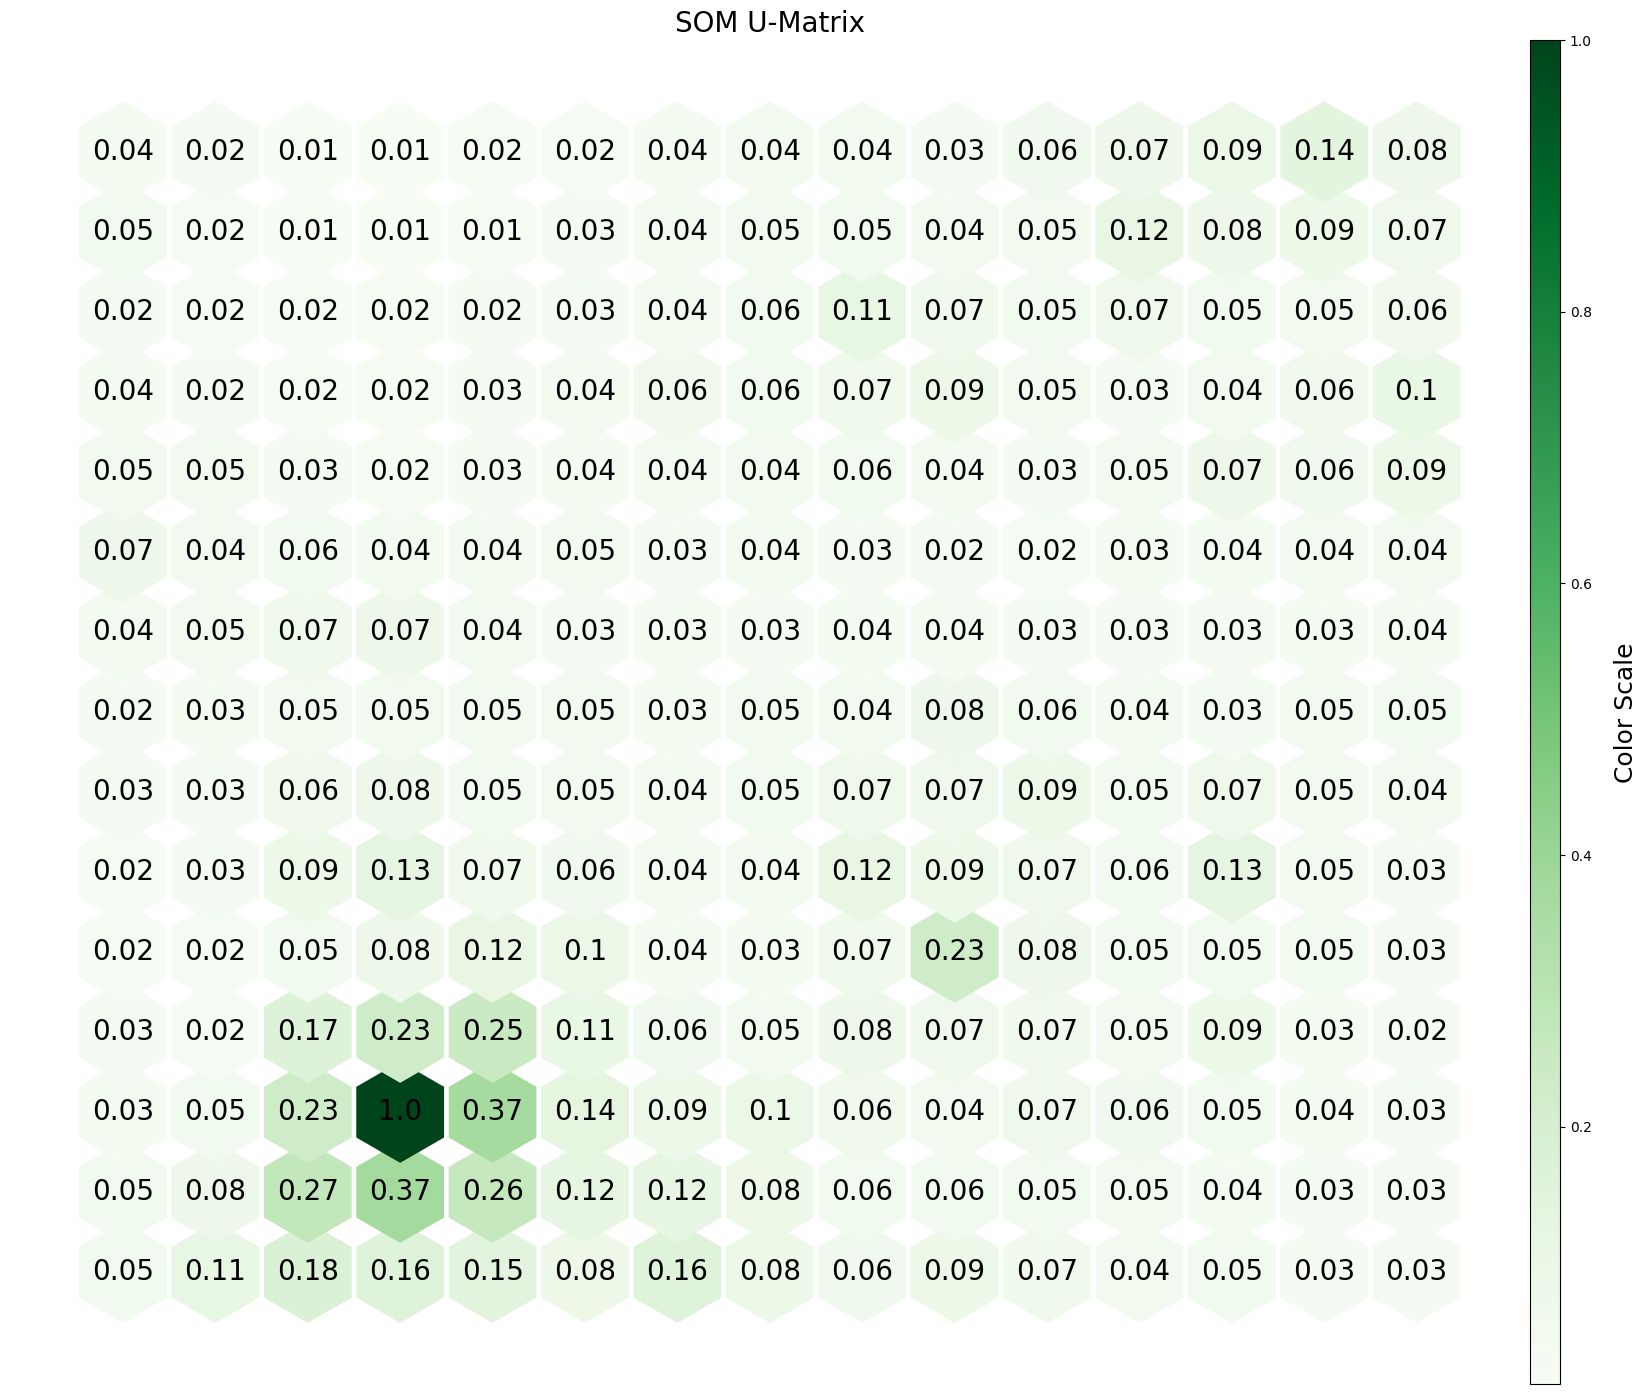

In [36]:
umatrix = som.distance_map(scaling='mean')

fig = f.plot_som_hexagons(som, umatrix, 
                          cmap=cm.Greens, 
                          title="SOM U-Matrix")
plt.show()

### 2.3.1 SOM + K-Means

In [37]:
scaled_data_copy = scaled_data.copy()
scaled_data_array_copy = scaled_data_array.copy()

Get Best Matching Units and convert their coordinater to features

In [38]:
som_labels = np.array([som.winner(x) for x in scaled_data_array_copy])

som_features = np.array([som.get_weights()[x[0], x[1]].flatten() for x in som_labels])

Apply K-Means in the SOM features

In [39]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(som_features)
    dispersion.append(kmeans.inertia_)
    

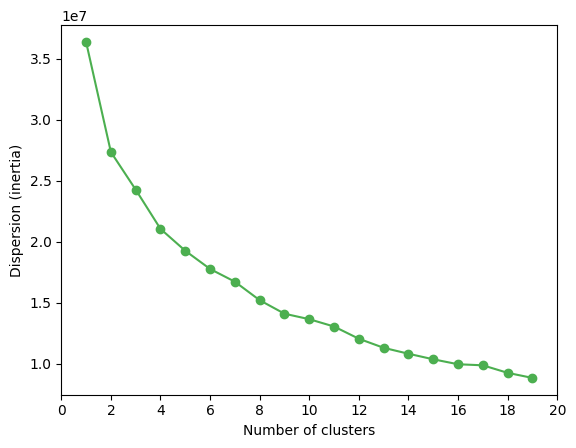

In [40]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [41]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, 
                 n_init=15, 
                 random_state=1)

In [42]:
scaled_data['som_kmeans_labels'] = kmclust.fit_predict(som_features)

In [43]:
feats = scaled_data_copy.columns.to_list()

r2, silhouette, calinski_harabasz = f.cluster_evaluation(scaled_data_copy, 
                                                       feats, scaled_data['som_kmeans_labels'])

print(f'R2 for SOM+K-Means: {r2}')
print(f'Silhouette Score for SOM+K-Means: {silhouette}')
print(f'Calinski Harabasz Index for SOM+K-Means: {calinski_harabasz}')

R2 for SOM+K-Means: [0.27039066]
Silhouette Score for SOM+K-Means: [0.5852518]
Calinski Harabasz Index for SOM+K-Means: [5897.11649161]


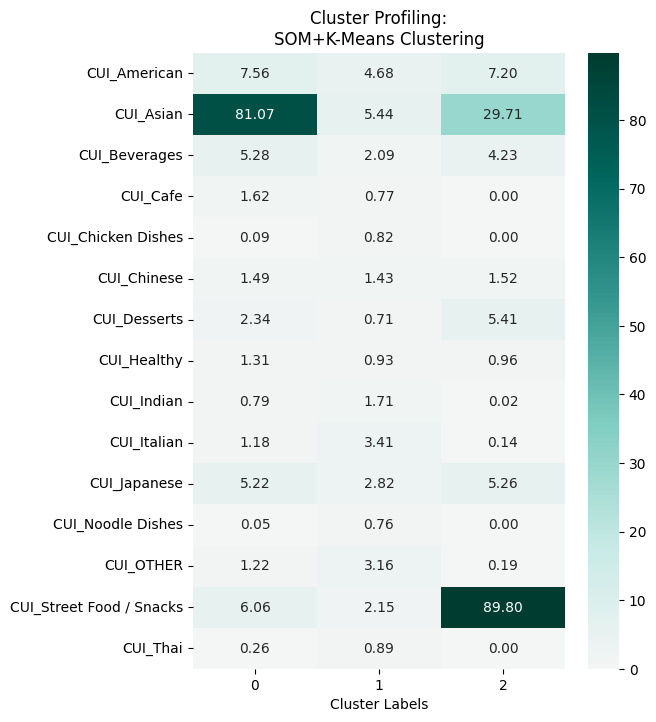

In [44]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['som_kmeans_labels'], "SOM+K-Means")

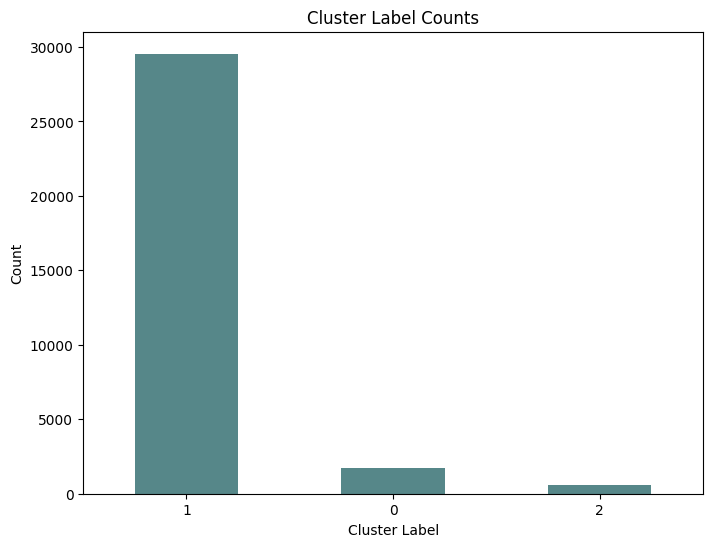

In [45]:
f.plot_counts(scaled_data['som_kmeans_labels'])

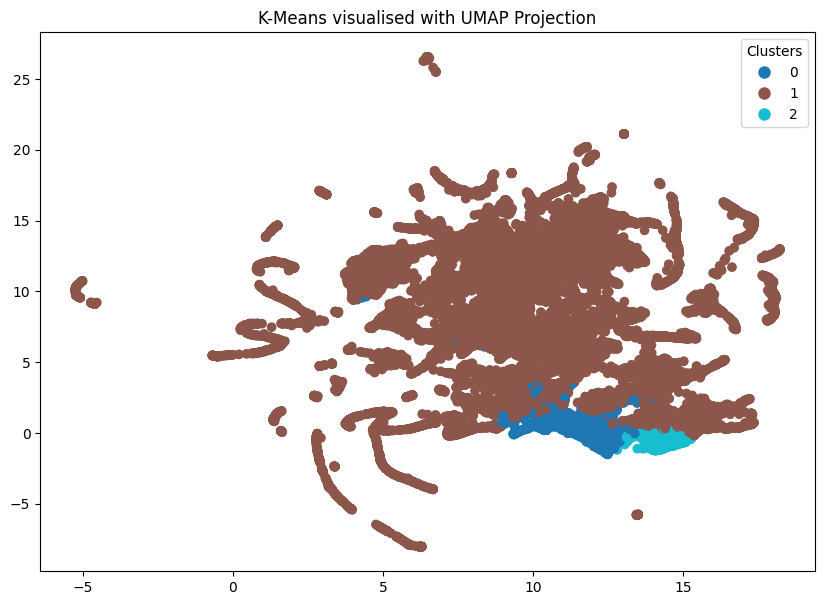

In [46]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['som_kmeans_labels'],
                   technique = 'SOM & K-Means visualised with UMAP')

## 2.4 Density Based Clustering

### 2.4.1 Mean Shift Clustering

In [88]:
bandwidth = estimate_bandwidth(scaled_data[features], quantile=0.99, random_state=1, n_jobs=-1)
bandwidth

np.float64(151.67715865774372)

In [89]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(scaled_data[features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 6


In [90]:
ms_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "meanshift", 'bandwidth': bandwidth, 
     'cluster_all': True, 'min_bin_freq': k}
    for k in range(1, 5)  
] + [
    {"model_type": "meanshift", 'bandwidth': bandwidth, 
     'cluster_all': False, 'min_bin_freq': k}
    for k in range(1, 5)  
] 
# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    ms_results.append(result)

# Convert results to DataFrame
ms_results_df = pd.DataFrame(ms_results)
ms_results_df

,Model,bandwidth,cluster_all,min_bin_freq,R2,Silhouette,Calinski-Harabasz
0,meanshift,151.677159,True,1,0.105058,0.840007,466.907046
1,meanshift,151.677159,True,2,0.105058,0.840007,466.907046
2,meanshift,151.677159,True,3,0.105058,0.840007,466.907046
3,meanshift,151.677159,True,4,0.105058,0.840007,466.907046
4,meanshift,151.677159,False,1,0.125584,0.805661,507.744311
5,meanshift,151.677159,False,2,0.125584,0.805661,507.744311
6,meanshift,151.677159,False,3,0.125584,0.805661,507.744311
7,meanshift,151.677159,False,4,0.125584,0.805661,507.744311


In [91]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)

scaled_data['ms_labels'] = ms.fit_predict(scaled_data[features])

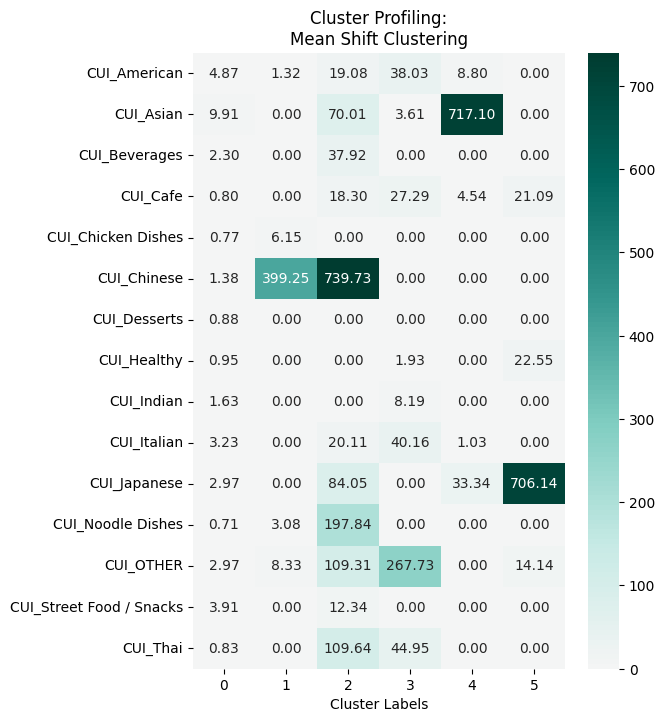

In [92]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['ms_labels'], "Mean Shift")

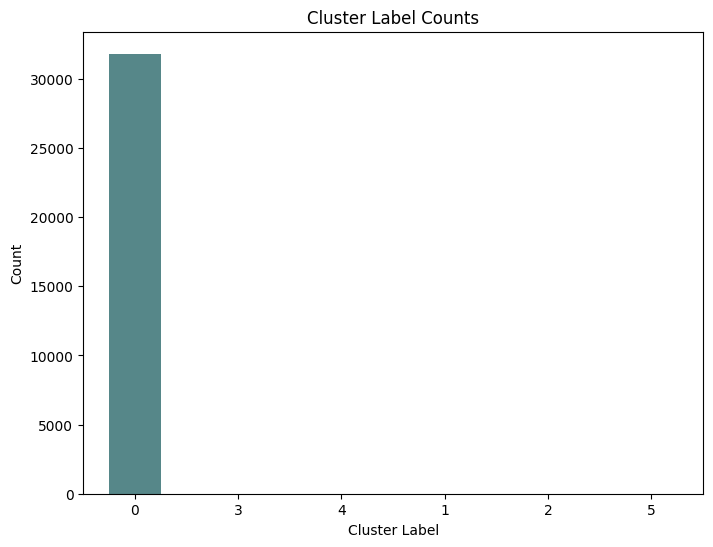

In [93]:
f.plot_counts(scaled_data['ms_labels'])

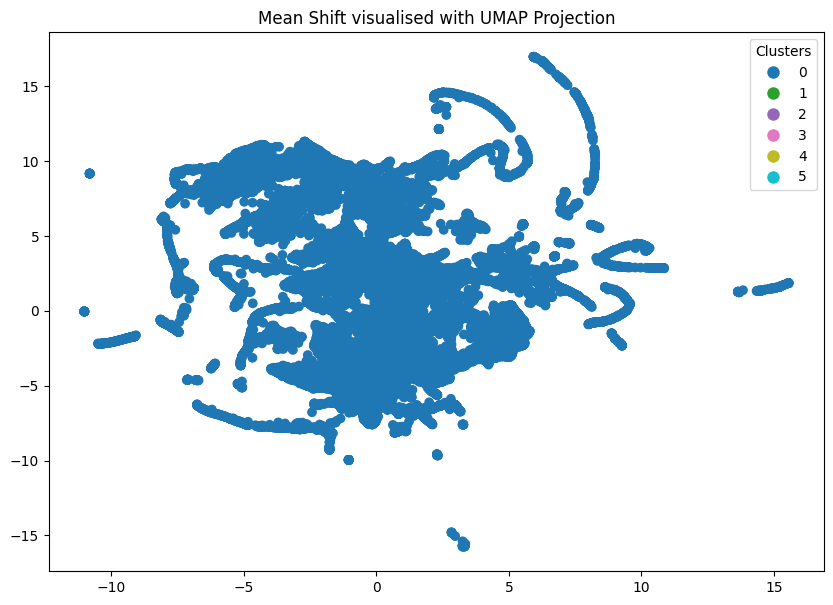

In [94]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['ms_labels'],
                   technique = 'Mean Shift visualised with UMAP')

### 2.4.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

To initialize the DBSCAN clustering algorithm, we first constructed a **K-Distance Graph** to determine an appropriate range for the `eps` hyperparameter. The elbow point in the graph provided a starting point for selecting potential values of `eps`.

With the range of `eps` values suggested by the plot, we tested several combinations of hyperparameters, including:  
- Different values for `eps`.  
- Different algorithm types (`'ball_tree'`, `'kd_tree'`, `'brute'`).  

The combinations were then evaluated using the same metrics previously explained:
- **R² Score**.  
- **Silhouette Score**.  
- **Calinski-Harabasz Score**.

At the end, we choose our best dbscan solution.


**Optimising *Eps* Parameter**

To determine the optimal value for the `eps` parameter in **DBSCAN**, we started by constructing a **K-Distance Graph**. This approach helps visualize the distances to the k-th nearest neighbour for all points in the dataset and guides us in selecting an appropriate `eps` value. The **`eps` (epsilon)** parameter determines the maximum distance between two points to classify them as part of the same cluster in DBSCAN. 



The **K-Distance Graph** plots the sorted distances to each point’s k-th nearest neighbour. By observing the graph:

1. Look for the **elbow point** in the curve. 
   - This is the region where the distances transition from a gradual increase to a sharp rise. 
   - The elbow indicates the maximum distance within a cluster before reaching outliers.

2. Select an `eps` value slightly larger than the distance at the elbow.
   - This ensures all points within dense clusters are captured without including many outliers.


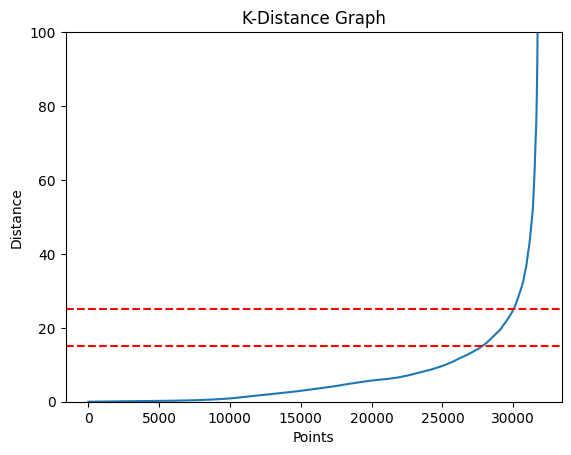

In [ ]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(scaled_data[features])
distances, _ = neigh.kneighbors(scaled_data[features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylim(0, 100)
plt.axhline(y=15, color='red', linestyle='--')
plt.axhline(y=25, color='red', linestyle='--')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.show()

In [52]:
db_results = []
algorithms_db_scan = ['ball_tree', 'kd_tree', 'brute']

# Define clustering settings
cluster_settings = [
    {"model_type": "dbscan", "eps": k, "algorithm": algorithm}
    for k in range(15, 25) 
    for algorithm in algorithms_db_scan
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    db_results.append(result)

# Convert results to DataFrame
db_results_df = pd.DataFrame(db_results)

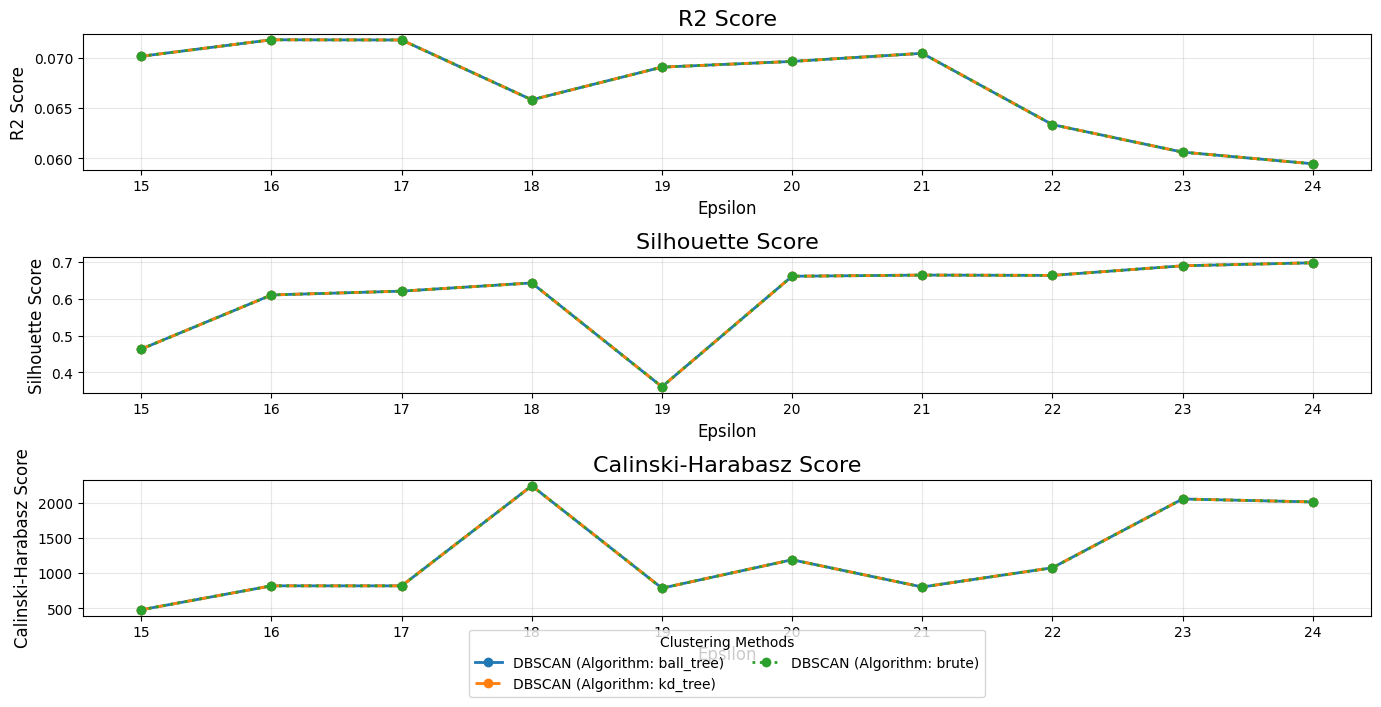

In [53]:
f.plot_evaluation_scores(db_results_df, path+'DBScan')

**Final Model**

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=17)
scaled_data['dbscan17_labels'] = dbscan.fit_predict(scaled_data[features])

dbscan_n_clusters = len(np.unique(scaled_data['dbscan17_labels'] ))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 4


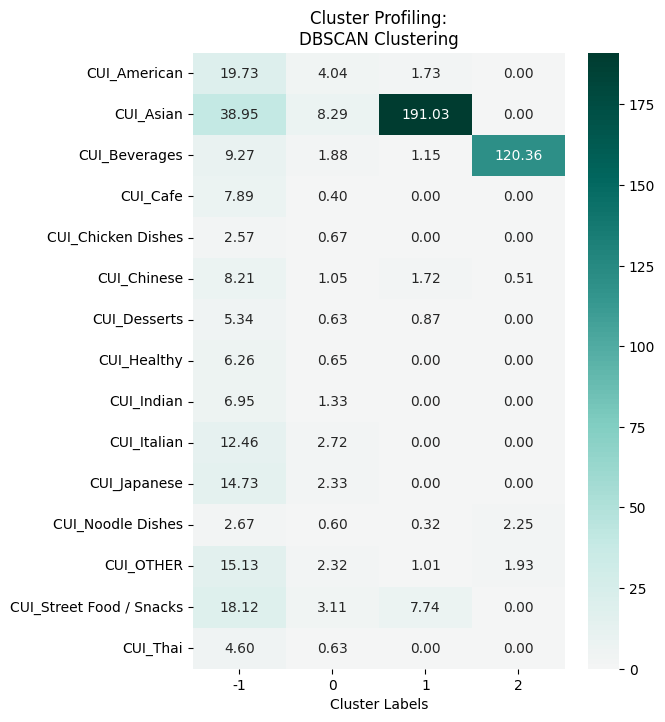

In [ ]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['dbscan17_labels'], "DBSCAN")

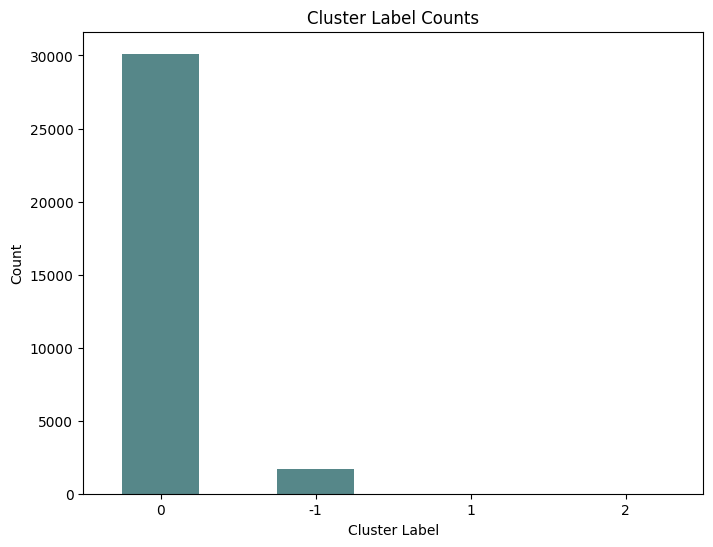

In [56]:
f.plot_counts(scaled_data['dbscan17_labels'])

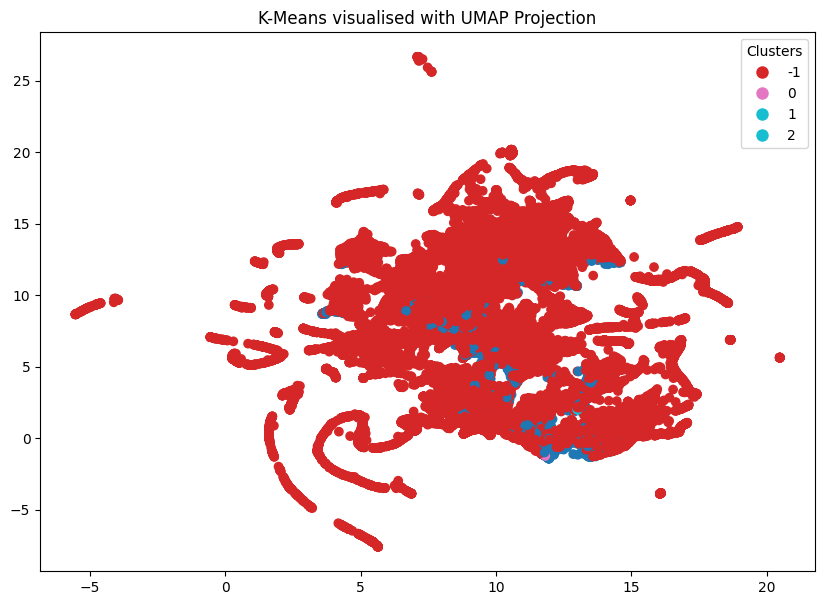

In [57]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['dbscan17_labels'],
                   technique = 'DBSCAN visualised with UMAP')

In [58]:
# Detecting noise (potential outliers)
scaled_data.loc[scaled_data['dbscan17_labels'] == -1]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,hc_labels,kmeans5_labels,kmeans6_labels,som_kmeans_labels,dbscan17_labels
customer_id,,,,,,,,,,,,,,,,,,,,
d5cbe9cd02,0.00,0.00,27.09,2.23,0.0,58.94,0.00,5.63,0.00,0.00,0.00,0.0,3.04,0.00,0.00,0,2,2,1,-1
4dfcdff3c0,31.56,0.00,0.00,0.00,0.0,35.12,0.00,0.00,0.00,34.22,0.00,0.0,0.00,18.13,0.00,0,0,5,1,-1
c6e9b0e409,2.65,0.00,0.00,24.24,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,17.22,0.00,0,2,2,1,-1
04f0d5feb9,0.00,52.70,0.00,0.00,0.0,0.00,0.00,0.00,0.00,40.05,0.00,0.0,0.00,0.00,4.64,3,1,3,0,-1
0eaf6fb609,0.00,9.86,0.00,36.99,0.0,0.00,0.00,0.00,0.00,17.10,0.00,0.0,39.03,0.00,0.00,0,0,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635159e03,0.00,24.64,0.00,0.00,0.0,0.00,18.04,0.00,0.00,0.00,36.74,0.0,0.00,0.00,0.00,0,1,3,1,-1
ac49a114bc,0.00,44.81,0.00,0.00,0.0,0.00,0.00,0.00,25.67,24.10,0.00,0.0,0.00,0.00,0.00,3,1,3,1,-1
0bfd72813a,38.43,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,93.06,0.0,0.00,0.00,0.00,0,0,5,1,-1


In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=18)
scaled_data['dbscan18_labels'] = dbscan.fit_predict(scaled_data[features])

dbscan_n_clusters = len(np.unique(scaled_data['dbscan18_labels'] ))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


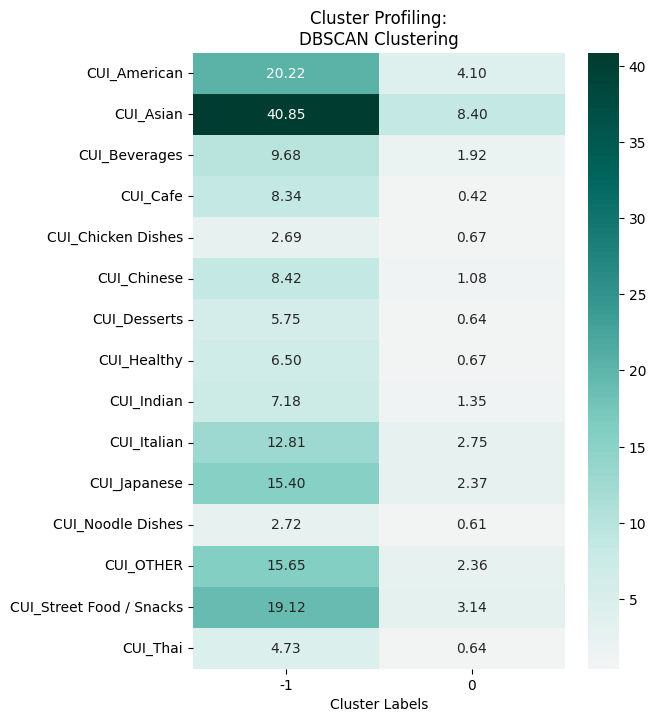

In [ ]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['dbscan18_labels'], "DBSCAN")

In [ ]:
f.plot_counts(scaled_data['dbscan18_labels'])

In [ ]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['dbscan18_labels'],
                   technique = 'DBSCAN visualised with UMAP')

In [61]:
# Detecting noise (potential outliers)
scaled_data.loc[scaled_data['dbscan18_labels'] == -1]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,hc_labels,kmeans5_labels,kmeans6_labels,som_kmeans_labels,dbscan17_labels,dbscan18_labels
customer_id,,,,,,,,,,,,,,,,,,,,,
4dfcdff3c0,31.56,0.00,0.00,0.00,0.0,35.12,0.00,0.00,0.00,34.22,0.00,0.0,0.00,18.13,0.00,0,0,5,1,-1,-1
04f0d5feb9,0.00,52.70,0.00,0.00,0.0,0.00,0.00,0.00,0.00,40.05,0.00,0.0,0.00,0.00,4.64,3,1,3,0,-1,-1
0eaf6fb609,0.00,9.86,0.00,36.99,0.0,0.00,0.00,0.00,0.00,17.10,0.00,0.0,39.03,0.00,0.00,0,0,2,1,-1,-1
58b53ace3f,0.00,0.00,24.02,0.00,0.0,0.00,24.67,0.00,0.00,0.00,0.00,0.0,0.00,98.92,0.00,2,4,1,2,-1,-1
928baa4e96,71.53,17.51,0.00,0.00,0.0,0.00,0.00,0.00,40.16,21.27,9.67,0.0,0.00,0.00,5.54,0,0,5,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfa4373541,0.00,33.02,0.00,25.62,0.0,0.00,0.00,0.00,16.55,0.00,12.34,0.0,19.98,0.00,0.00,0,1,3,1,-1,-1
4de3045a30,0.00,11.67,61.72,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.86,0.0,0.00,0.00,0.00,0,2,2,1,-1,-1
ac49a114bc,0.00,44.81,0.00,0.00,0.0,0.00,0.00,0.00,25.67,24.10,0.00,0.0,0.00,0.00,0.00,3,1,3,1,-1,-1


### 2.4.3 HDBSCAN

In [96]:
hdb_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'leaf'}
    for k in range(5, 75, 10)  
] + [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'eom'}
    for k in range(5, 75, 10)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hdb_results.append(result)

# Convert results to DataFrame
hdb_results_df = pd.DataFrame(hdb_results)
hdb_results_df

,Model,min_cluster_size,cluster_selection_method,R2,Silhouette,Calinski-Harabasz
0,hdbscan,5,leaf,0.150367,-0.225164,4.520872
1,hdbscan,15,leaf,0.082670,-0.370677,10.774431
2,hdbscan,25,leaf,0.063845,-0.395358,17.022876
3,hdbscan,35,leaf,0.057147,-0.388426,24.052682
4,hdbscan,45,leaf,0.048143,-0.403363,29.217426
5,hdbscan,55,leaf,0.046260,-0.396098,36.707173
6,hdbscan,65,leaf,0.049931,-0.346040,47.738442
7,hdbscan,5,eom,0.162936,-0.182088,5.802602
8,hdbscan,15,eom,0.100187,-0.280370,22.175874
9,hdbscan,25,eom,0.076941,-0.291176,29.724670


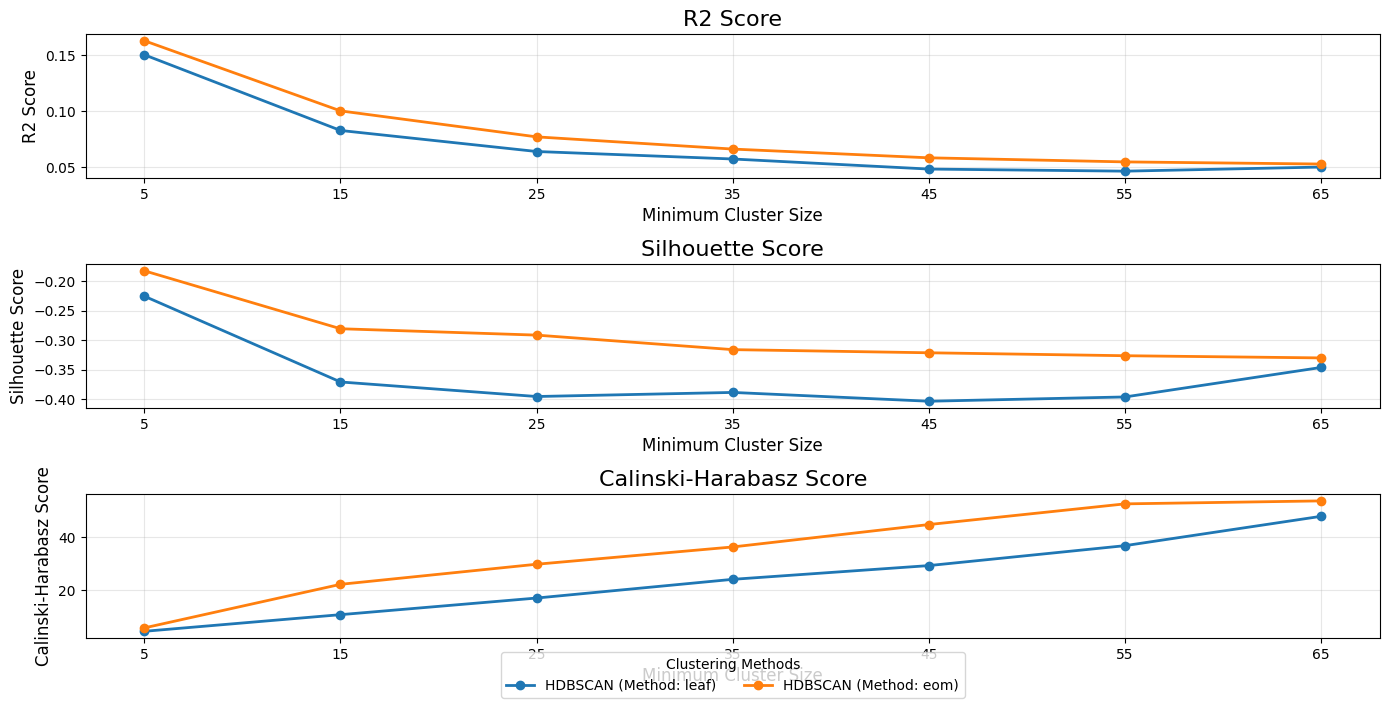

In [97]:
f.plot_evaluation_scores(hdb_results_df, path+'HDBScan_scores')

**Final model for HDBScan**

In [102]:
hdbscan = HDBSCAN(min_cluster_size = 35, 
                  cluster_selection_method = 'eom')

scaled_data['hdb_labels'] = hdbscan.fit_predict(scaled_data[features])

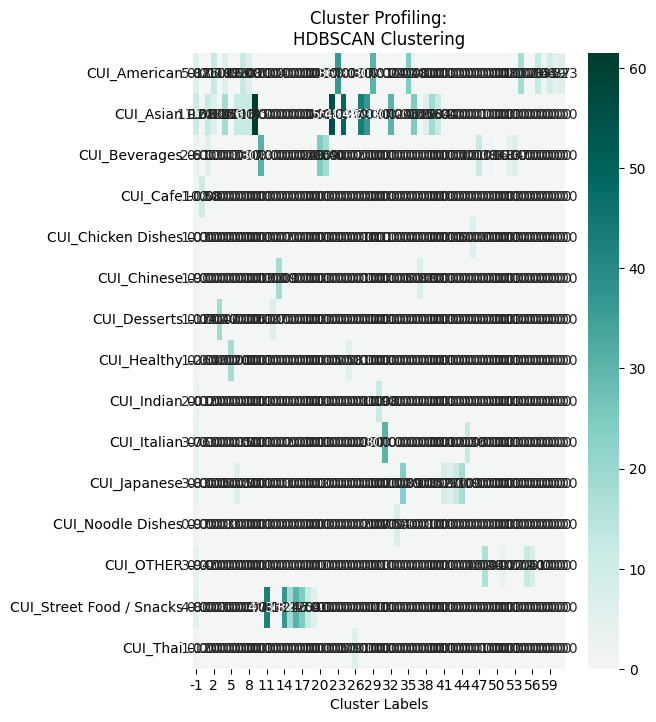

In [106]:
f.plot_cluster_profiling(scaled_data[features], scaled_data['hdb_labels'], "HDBSCAN")

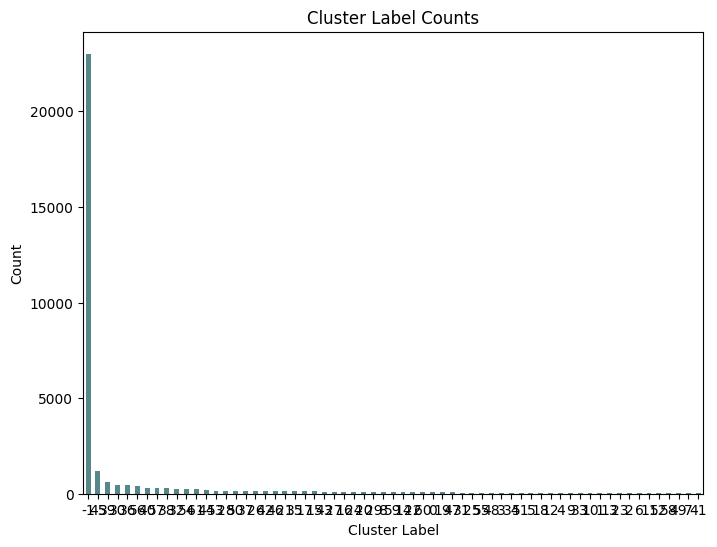

In [104]:
f.plot_counts(scaled_data['hdb_labels'])

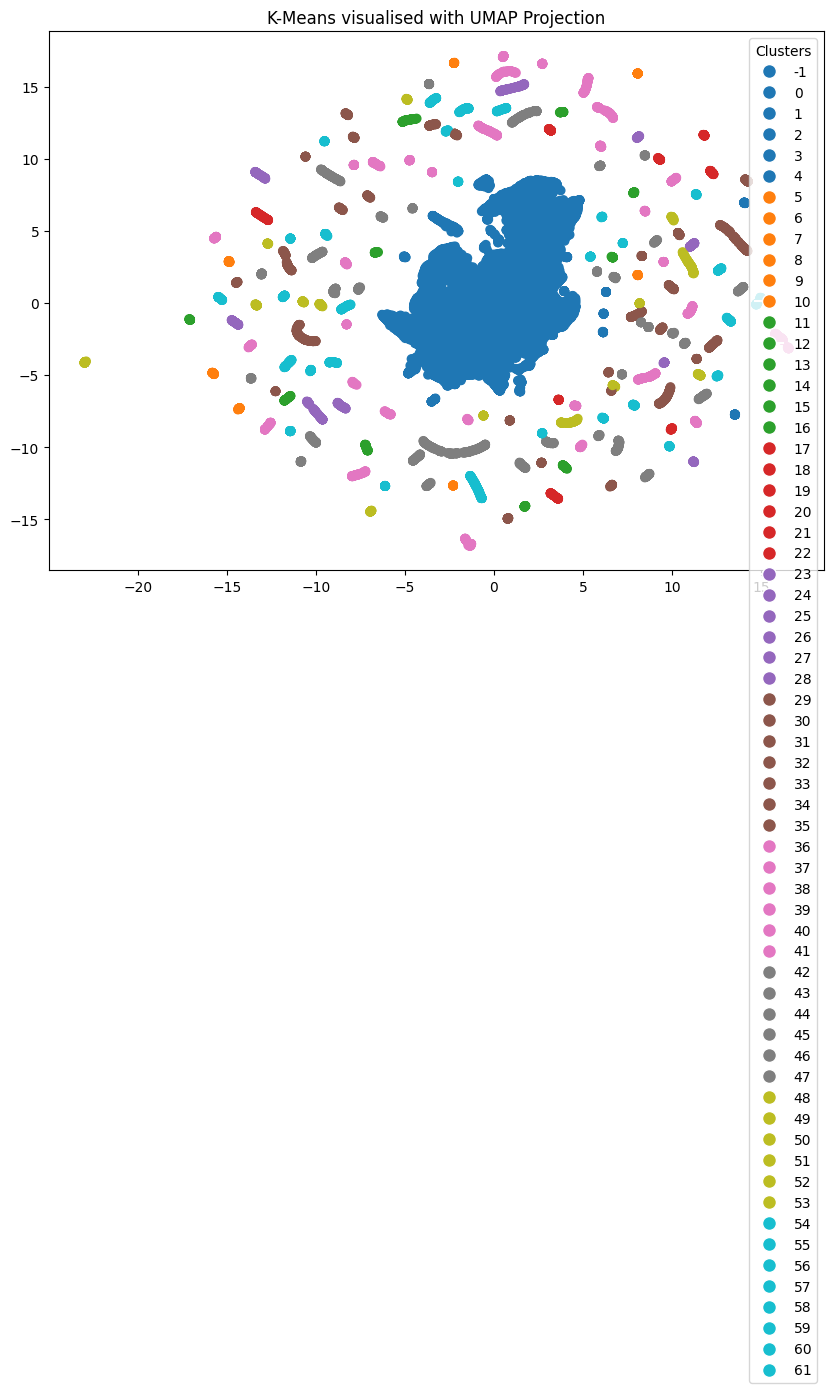

In [105]:
umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = scaled_data['hdb_labels'],
                   technique = 'K-Means visualised with UMAP')

### 2.4.4 Gaussian Mixture Model (GMM)

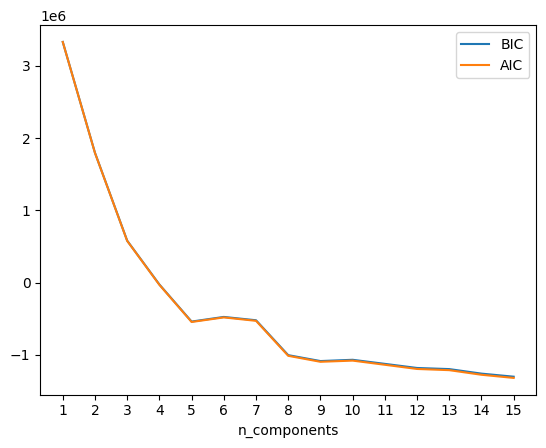

In [ ]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(scaled_data[features])
          for n in n_components]

bic_values = [m.bic(scaled_data[features]) for m in models]
aic_values = [m.aic(scaled_data[features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(5, covariance_type='full', n_init=10, random_state=1)
gmm_labels = gmm.fit_predict(scaled_data[features])
scaled_data['gmm_labels'] = gmm.predict_proba(scaled_data[features])

In [ ]:
# Computing the R^2 of the cluster solution
r2 = f.get_rsq(scaled_data, features, 'gmm_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0667


# 4. Model Comparison

<a href="#top">Top &#129033;</a>

In [98]:
hr_results_df.to_csv('./result_dfs/cuisine_data/hr_results_df.csv')
kmeans_results_df.to_csv('./result_dfs/cuisine_data/results_kmeans_df.csv')
db_results_df.to_csv('./result_dfs/cuisine_data/db_results_df.csv')
hdb_results_df.to_csv('./result_dfs/cuisine_data/hdb_results_df.csv')

In [99]:
hr_results_df = pd.read_csv('./result_dfs/cuisine_data/hr_results_df.csv')
kmeans_results_df = pd.read_csv('./result_dfs/cuisine_data/results_kmeans_df.csv')
db_results_df = pd.read_csv('./result_dfs/cuisine_data/db_results_df.csv')
hdb_results_df = pd.read_csv('./result_dfs/cuisine_data/hdb_results_df.csv')

Join all Dataframes

In [100]:
dfs = [hr_results_df, kmeans_results_df, db_results_df, hdb_results_df]
results_df = pd.concat(dfs)
results_df.reset_index()
results_df.drop('Unnamed: 0', axis = 1, inplace = True)

Create a new Dataframe with the Model name, Metric Name and corresponding value.

In [101]:
results_df['Configuration'] = results_df.apply(f.create_configuration, axis=1)

# Reshape the DataFrame into long format
metrics = ['R2', 'Silhouette', 'Calinski-Harabasz']
df_melted = results_df.melt(
    id_vars=['Configuration'],  # Use combined configurations
    value_vars=metrics,
    var_name='Metric',
    value_name='Value'
)


AttributeError: module 'functions' has no attribute 'create_configuration'

In [135]:
df_melted

NameError: name 'df_melted' is not defined

Plot all models and choose the best

In [134]:
metrics = ['R2', 'Silhouette', 'Calinski-Harabasz']
model_for_line = 'kmeans (n_clusters=5.0)'  
f.model_comparison(df_melted, metrics, model_for_line)

AttributeError: module 'functions' has no attribute 'model_comparison'

**Final Solution**

In [130]:
final_df = cui_data.merge(scaled_data[[ 'kmeans5_labels']], on='customer_id', how='left')
final_df = final_df.rename(columns={'kmeans5_labels': 'cusine_labels'})
final_df

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,cusine_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,2
5d272b9dcb,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
f6d1b2ba63,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
180c632ed8,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,2
4eb37a6705,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
f6b6709018,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
f74ad8ce3f,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2


In [131]:
final_df.to_csv('./data/labels/cuisine_data.csv')